In [34]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

In [35]:
import matplotlib.pyplot as plt


In [37]:
#pip install wordcloud

In [38]:
from wordcloud import WordCloud

In [39]:
# creating empty reviews list 
PowerBank_3i_reviews=[]

In [40]:
for i in range (1,21):
    ip=[]
    url='https://www.amazon.in/10000mAH-Li-Polymer-Power-Charging-Midnight/product-reviews/B08HVL8QN3/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    response = requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.find_all("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        ip.append(reviews[i].text)
    PowerBank_3i_reviews=PowerBank_3i_reviews+ip

In [41]:
PowerBank_3i_reviews

['\n\n  The same power bank in 20000 mAH provides type C output which is apt for charging iPhone 12 which comes with type C to lighting cable. However, 10000 mAH doesn’t come with that option. I just saw the type C option and ordered. Now, I don’t see the option of replacement or return. One can only replace with the same if there is any defect. I know it’s partially my mistake that I am not that technically sound and didn’t know about it and just read that the power back is compatible with iPhone 12. However, it is wrong to not provide return option when it is almost available with every product on Amazon. Really disappointed. I’ll take my feedback back if you will allow me to exchange it with mi pocket power back. This is a request.\n\n',
 '\n\n  At first the power bank seems solid & sturdy but after usage i changed my mind completely.The second light was blinking when i kept it on charge using my one plus warp charger.Believe me the whole night it was on charging & almost after 13 h

In [42]:
with open('PowerBank_3i.txt','w',encoding='utf8') as output:
    output.write(str(PowerBank_3i_reviews))
    

In [43]:
#joining all reviews into a single paragraph
ip_rev_string=" ".join(PowerBank_3i_reviews)

In [44]:
import nltk

In [45]:
#removing unwanted symbols incase if exists
ip_rev_string=re.sub('[^A-Za-z' ']+', ' ', ip_rev_string).lower()
ip_rev_string=re.sub('[0-9' ']+', ' ', ip_rev_string)

In [46]:
# words that contained in mi power bank reviews
ip_reviews_words = ip_rev_string.split(" ")

In [47]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [48]:
vectorizer = TfidfVectorizer(ip_reviews_words, use_idf=True,ngram_range=(1, 3))


C:\Users\chinni\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['', 'the', 'same', 'power', 'bank', 'in', 'mah', 'provides', 'type', 'c', 'output', 'which', 'is', 'apt', 'for', 'charging', 'iphone', 'which', 'comes', 'with', 'type', 'c', 'to', 'lighting', 'cable', 'however', 'mah', 'doesn', 't', 'come', 'with', 'that', 'option', 'i', 'just', 'saw', 'the', 'type', 'c', 'option', 'and', 'ordered', 'now', 'i', 'don', 't', 'see', 'the', 'option', 'of', 'replacement', 'or', 'return', 'one', 'can', 'only', 'replace', 'with', 'the', 'same', 'if', 'there', 'is', 'any', 'defect', 'i', 'know', 'it', 's', 'partially', 'my', 'mistake', 'that', 'i', 'am', 'not', 'that', 'technically', 'sound', 'and', 'didn', 't', 'know', 'about', 'it', 'and', 'just', 'read', 'that', 'the', 'power', 'back', 'is', 'compatible', 'with', 'iphone', 'however', 'it', 'is', 'wrong', 'to', 'not', 'provide', 'return', 'option', 'when', 'it', 'is', 'almost', 'available', 'with', 'every',

In [49]:
x = vectorizer.fit_transform(ip_reviews_words)

In [50]:
with open("C:\data\data science\Study material\Text Mining and sentiment analysis\Datasets NLP\stop.txt","r") as sw:
    stop_words = sw.read()


In [51]:
stop_words=stop_words.split("\n")

In [54]:
stop_words.extend(["power","backup","price","time","charge","service"])

In [55]:
ip_reviews_words=[w for w in ip_reviews_words if not w in stop_words]

In [56]:
#joining all reviews into single paragraph
ip_rev_string=" ".join (ip_reviews_words)

In [57]:
ip_rev_string

' bank mah type output apt charging iphone type lighting cable mah doesn option type option ordered don option replacement return replace defect partially mistake technically sound didn read back compatible iphone wrong provide return option product amazon disappointed ll feedback back exchange mi pocket back request bank solid sturdy usage changed mind completely light blinking warp charger night charging hours reached iiird cell taking hours completely bad version powerbank mi charging samsung full speeds max speed phone supports confirm genuine product official website mi digit authentication code box doubt mi genuine product checked searching product checked mi website reply product verified means genuine mi providing facility customer chey products online disappointed continues led notification charging blinks seconds don times delayed confused charging charging bank battery discharging received fake knock mi bank check product fake mine hologram box queried times bought brand buy

In [58]:
#word cloud can perform on the string inputs
#corpus level word cloud

In [66]:
wordcloud_ip =WordCloud(
                    background_color='black',
                    width=1500,
                    height=1000).generate (ip_rev_string)

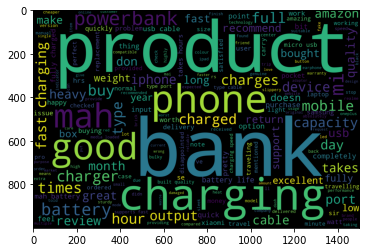

In [67]:
plt.imshow(wordcloud_ip)

In [69]:
#positive words#
with open("C:\data\data science\Study material\Text Mining and sentiment analysis\Datasets NLP\positive-words.txt","r") as pos:
    poswords=pos.read().split("\n")

In [73]:
#positive word cloud
#choosing the only words which are present in positive words
ip_pos_in_pos=" ".join ([w for w in ip_reviews_words if w in poswords])

In [77]:
wordcloud_pos_in_pos=WordCloud(
                            background_color="black",
                            width=1500,
                            height=1000).generate (ip_pos_in_pos)

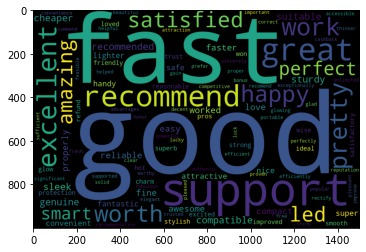

In [78]:
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

In [84]:
#negative words#
with open(r"C:\data\data science\Study material\Text Mining and sentiment analysis\Datasets NLP\negative-words.txt","r") as neg:
    negwords=neg.read().split("\n")

In [92]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])


In [96]:
wordcloud_neg_in_neg=WordCloud(
                            background_color="black",
                            width=1500,
                            height=1000).generate (ip_neg_in_neg)

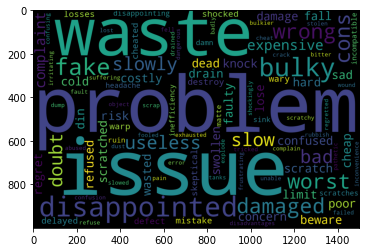

In [97]:
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)

In [99]:
#word cloud with bigram
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [100]:
WNL=nltk.WordNetLemmatizer()

In [101]:
#Lowercase and tokenize
text=ip_rev_string.lower()

In [102]:
#remove single quotes early since it causes problem with the token
text=text.replace("'","")

In [103]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

In [104]:
text1

<Text: bank mah type output apt charging iphone type...>

In [106]:
#remove extra chars and remove stop words
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]


In [109]:

# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['price', 'great'] # If you want to remove any particular word form text which does not contribute much in meaning


In [110]:

new_stopwords = stopwords_wc.union(customised_words)

# Remove stop words
text_content = [word for word in text_content if word not in new_stopwords]



In [115]:
# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chinni\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [117]:
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

In [118]:
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)


[('bank', 'mah'), ('mah', 'type'), ('type', 'output'), ('output', 'apt'), ('apt', 'charging'), ('charging', 'iphone'), ('iphone', 'type'), ('type', 'lighting'), ('lighting', 'cable'), ('cable', 'mah'), ('mah', 'doesn'), ('doesn', 'option'), ('option', 'type'), ('type', 'option'), ('option', 'ordered'), ('ordered', 'don'), ('don', 'option'), ('option', 'replacement'), ('replacement', 'return'), ('return', 'replace'), ('replace', 'defect'), ('defect', 'partially'), ('partially', 'mistake'), ('mistake', 'technically'), ('technically', 'sound'), ('sound', 'didn'), ('didn', 'read'), ('read', 'back'), ('back', 'compatible'), ('compatible', 'iphone'), ('iphone', 'wrong'), ('wrong', 'provide'), ('provide', 'return'), ('return', 'option'), ('option', 'product'), ('product', 'amazon'), ('amazon', 'disappointed'), ('disappointed', 'll'), ('ll', 'feedback'), ('feedback', 'back'), ('back', 'exchange'), ('exchange', 'mi'), ('mi', 'pocket'), ('pocket', 'back'), ('back', 'request'), ('request', 'bank'

In [119]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)


['bank mah', 'mah type', 'type output', 'output apt', 'apt charging', 'charging iphone', 'iphone type', 'type lighting', 'lighting cable', 'cable mah', 'mah doesn', 'doesn option', 'option type', 'type option', 'option ordered', 'ordered don', 'don option', 'option replacement', 'replacement return', 'return replace', 'replace defect', 'defect partially', 'partially mistake', 'mistake technically', 'technically sound', 'sound didn', 'didn read', 'read back', 'back compatible', 'compatible iphone', 'iphone wrong', 'wrong provide', 'provide return', 'return option', 'option product', 'product amazon', 'amazon disappointed', 'disappointed ll', 'll feedback', 'feedback back', 'back exchange', 'exchange mi', 'mi pocket', 'pocket back', 'back request', 'request bank', 'bank solid', 'solid sturdy', 'sturdy usage', 'usage changed', 'changed mind', 'mind completely', 'completely light', 'light blinking', 'blinking warp', 'warp charger', 'charger night', 'night charging', 'charging hour', 'hour 

In [120]:

# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_


{'bank mah': 220,
 'mah type': 1922,
 'type output': 3359,
 'output apt': 2236,
 'apt charging': 99,
 'charging iphone': 675,
 'iphone type': 1677,
 'type lighting': 3354,
 'lighting cable': 1804,
 'cable mah': 469,
 'mah doesn': 1898,
 'doesn option': 1050,
 'option type': 2215,
 'type option': 3358,
 'option ordered': 2212,
 'ordered don': 2224,
 'don option': 1061,
 'option replacement': 2214,
 'replacement return': 2848,
 'return replace': 2884,
 'replace defect': 2839,
 'defect partially': 949,
 'partially mistake': 2283,
 'mistake technically': 2065,
 'technically sound': 3226,
 'sound didn': 3084,
 'didn read': 1009,
 'read back': 2759,
 'back compatible': 135,
 'compatible iphone': 811,
 'iphone wrong': 1679,
 'wrong provide': 3569,
 'provide return': 2667,
 'return option': 2879,
 'option product': 2213,
 'product amazon': 2568,
 'amazon disappointed': 58,
 'disappointed ll': 1029,
 'll feedback': 1817,
 'feedback back': 1241,
 'back exchange': 136,
 'exchange mi': 1157,
 'mi 

In [121]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])


[('fast charging', 27), ('battery life', 12), ('mah battery', 10), ('fully charged', 10), ('charging phone', 10), ('usb cable', 10), ('mi bank', 9), ('take hour', 9), ('support fast', 8), ('charging mobile', 8), ('micro usb', 8), ('mi product', 7), ('product good', 7), ('built quality', 7), ('type port', 7), ('type cable', 7), ('charging speed', 7), ('bank mah', 6), ('good product', 6), ('bank good', 6), ('bank fully', 6), ('usb port', 6), ('quality product', 6), ('charging bank', 5), ('bank charged', 5), ('battery capacity', 5), ('mah bank', 5), ('medium loaded', 5), ('fast charger', 5), ('product mi', 5), ('charge phone', 5), ('phone charging', 5), ('genuine product', 4), ('bank battery', 4), ('good quality', 4), ('led light', 4), ('life good', 4), ('charging mah', 4), ('doesn support', 4), ('cable provided', 4), ('full bank', 4), ('hour full', 4), ('mi mah', 4), ('usb type', 4), ('port charging', 4), ('charging battery', 4), ('quick charging', 4), ('hour fully', 4), ('bank take', 4)

In [122]:

# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)


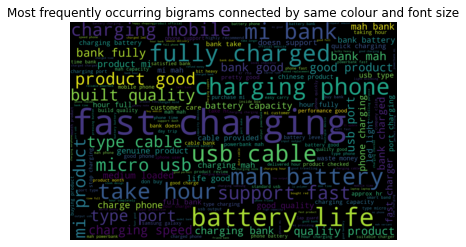

In [123]:
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
